In [2]:
%matplotlib inline
%pylab inline

import string
import collections
import unicodedata
import re
import codecs
import numpy as np
import random
import editdistance

import ast
import joblib
import numpy as np
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:
devanagariChars = [u'\u0900', u'\u0901', u'\u0902', u'\u0903', u'\u0904', u'\u0905', u'\u0906', u'\u0907', u'\u0908', u'\u0909', u'\u090a', u'\u090b', u'\u090c', u'\u090d', u'\u090e', u'\u090f', u'\u0910', u'\u0911', u'\u0912', u'\u0913', u'\u0914', u'\u0915', u'\u0916', u'\u0917', u'\u0918', u'\u0919', u'\u091a', u'\u091b', u'\u091c', u'\u091d', u'\u091e', u'\u091f', u'\u0920', u'\u0921', u'\u0922', u'\u0923', u'\u0924', u'\u0925', u'\u0926', u'\u0927', u'\u0928', u'\u0929', u'\u092a', u'\u092b', u'\u092c', u'\u092d', u'\u092e', u'\u092f', u'\u0930', u'\u0931', u'\u0932', u'\u0933', u'\u0934', u'\u0935', u'\u0936', u'\u0937', u'\u0938', u'\u0939', u'\u093a', u'\u093b', u'\u093c', u'\u093d', u'\u093e', u'\u093f', u'\u0940', u'\u0941', u'\u0942', u'\u0943', u'\u0944', u'\u0945', u'\u0946', u'\u0947', u'\u0948', u'\u0949', u'\u094a', u'\u094b', u'\u094c', u'\u094d', u'\u094e', u'\u094f', u'\u0950', u'\u0951', u'\u0952', u'\u0953', u'\u0954', u'\u0955', u'\u0956', u'\u0957', u'\u0958', u'\u0959', u'\u095a', u'\u095b', u'\u095c', u'\u095d', u'\u095e', u'\u095f', u'\u0960', u'\u0961', u'\u0962', u'\u0963', u'\u0964', u'\u0965', u'\u0966', u'\u0967', u'\u0968', u'\u0969', u'\u096a', u'\u096b', u'\u096c', u'\u096d', u'\u096e', u'\u096f', u'\u0970', u'\u0971', u'\u0972', u'\u0973', u'\u0974', u'\u0975', u'\u0976', u'\u0977', u'\u0978', u'\u0979', u'\u097a', u'\u097b', u'\u097c', u'\u097d', u'\u097e', u'\u097f']

In [4]:
with open('/home/kushagras/work/transliterationData/romanToDevanagiri/englishMap', 'r') as fp:
    EnglishMap = fp.read()
    EnglishMap = ast.literal_eval(EnglishMap)

    revEnglishMap = [0 for i in range(len(EnglishMap))]
    for key in EnglishMap:
        revEnglishMap[EnglishMap[key]] = key

In [5]:
with open('/home/kushagras/work/transliterationData/romanToDevanagiri/hindiMap', 'r') as fp:
    HindiMap = fp.read()
    HindiMap = ast.literal_eval(HindiMap)

    revHindiMap = [0 for i in range(len(HindiMap))]
    for key in HindiMap:
        revHindiMap[HindiMap[key]] = key

# GRU FOLD 1

In [5]:
testSourceFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/testMixed0.source.txt'
trainSourceFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/trainMixed0.source.txt'
testTargetFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/testMixed0.target.txt'
trainTargetFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/trainMixed0.target.txt'

with open(trainSourceFile, 'r') as fp:
    trainSource = fp.readlines()
    
for i in range(len(trainSource)):
    trainSource[i] = trainSource[i].strip('\n')
    string = ''
    for ch in trainSource[i].split(' '):
        if ch != '':
            string += revEnglishMap[int(ch)]
    trainSource[i] = string

with open(testSourceFile, 'r') as fp:
    testSource = fp.readlines()
    
for i in range(len(testSource)):
    testSource[i] = testSource[i].strip('\n')
    string = ''
    for ch in testSource[i].split(' '):
        if ch != '':
            string += revEnglishMap[int(ch)]
    testSource[i] = string

with open(trainTargetFile, 'r') as fp:
    trainTarget = fp.readlines()
    
for i in range(len(trainTarget)):
    trainTarget[i] = trainTarget[i].strip('\n')
    string = ''
    for ch in trainTarget[i].split(' '):
        if ch != '':
            string += devanagariChars[int(ch)]
    trainTarget[i] = string

with open(testTargetFile, 'r') as fp:
    testTarget = fp.readlines()
    
for i in range(len(testTarget)):
    testTarget[i] = testTarget[i].strip('\n')
    string = ''
    for ch in testTarget[i].split(' '):
        if ch != '':
            string += devanagariChars[int(ch)]
    testTarget[i] = string

In [9]:
checkPoints = [101103, 140196, 180636, 221075, 49878, 101104, 141543, 181983, 221076, 51226, 102451, 141544, 181984, 222423, 52574, 102452, 142891, 183331, 222424, 53922, 103799, 142892, 183332, 223771, 5393, 103800, 144239, 184679, 223772, 55270, 105147, 144240, 184680, 225119, 56618, 105148, 145587, 186027, 225120, 57966, 106495, 145588, 186028, 226467, 59314, 106496, 146935, 187375, 226468, 60662, 107843, 146936, 187376, 227815, 62010, 107844, 148283, 188723, 227816, 63358, 10786, 148284, 188724, 229163, 64706, 109191, 14830, 18874, 229164, 66054, 109192, 149631, 190071, 22918, 67402, 110539, 149632, 190072, 230511, 6741, 110540, 150979, 191419, 230512, 68750, 111887, 150980, 191420, 231859, 70098, 111888, 152327, 192767, 231860, 71446, 113235, 152328, 192768, 233207, 72794, 113236, 153675, 194115, 233208, 74142, 114583, 153676, 194116, 234555, 75490, 114584, 155023, 195463, 234556, 75491, 115931, 155024, 195464, 235903, 75492, 115932, 156371, 196811, 235904, 76839, 117279, 156372, 196812, 237251, 76840, 117280, 157719, 198159, 237252, 78187, 118627, 157720, 198160, 238599, 78188, 118628, 159067, 199507, 238600, 79535, 119975, 159068, 199508, 239947, 79536, 119976, 160415, 1, 239948, 80883, 121323, 160416, 200855, 241295, 80884, 121324, 161763, 200856, 241296, 8089, 12134, 161764, 202203, 242643, 82231, 122671, 16178, 202204, 242644, 82232, 122672, 163111, 20222, 24266, 83579, 124019, 163112, 203551, 243991, 83580, 124020, 164459, 203552, 245339, 84927, 125367, 164460, 204899, 246687, 84928, 125368, 165807, 204900, 248035, 86275, 126715, 165808, 206247, 249383, 86276, 126716, 167155, 206248, 250731, 87623, 128063, 167156, 207595, 252079, 87624, 128064, 168503, 207596, 25614, 88971, 129411, 168504, 208943, 26962, 88972, 129412, 169851, 208944, 2697, 90319, 130759, 169852, 210291, 28310, 90320, 130760, 171199, 210292, 29658, 91667, 132107, 171200, 211639, 31006, 91668, 132108, 172547, 211640, 32354, 93015, 133455, 172548, 212987, 33702, 93016, 133456, 173895, 212988, 35050, 94363, 134803, 173896, 214335, 36398, 94364, 134804, 175243, 214336, 37746, 9437, 13482, 175244, 215683, 39094, 9438, 1349, 17526, 215684, 40442, 95711, 136151, 176591, 21570, 4045, 95712, 136152, 176592, 217031, 41790, 97059, 137499, 177939, 217032, 43138, 97060, 137500, 177940, 218379, 44486, 98407, 138847, 179287, 218380, 45834, 98408, 138848, 179288, 219727, 47182, 99755, 140195, 180635, 219728, 48530, 99756]
checkPoints = sorted(checkPoints)

trainPredictionFiles = ['/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_0/predTrain/predictions' + str(ckp) + '.txt' for ckp in checkPoints]
testPredictionFiles = ['/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_0/predTest/predictions' + str(ckp) + '.txt' for ckp in checkPoints]

trainCERRecord = []
for fileName in trainPredictionFiles[2:]:
    

    if trainPredictionFiles.index(fileName) % 50 == 0:
        print fileName
        
    with open(fileName, 'r') as fp:
        trainPredicted = fp.readlines()

    for i in range(len(trainPredicted)):
        trainPredicted[i] = trainPredicted[i].strip('\n')
        string = ''
        for ch in trainPredicted[i].split(' '):
            if ch != '':
                string += devanagariChars[int(ch)]
        trainPredicted[i] = string
    
    CER = 0.
    for i in range(len(trainPredicted)):
        CER += (float(editdistance.eval(trainTarget[i], trainPredicted[i])) / len(trainTarget[i]))
    CER /= len(trainPredicted)
    CER *= 100
    trainCERRecord.append(CER)

testCERRecord = []

for fileName in testPredictionFiles[2: ]:

    if testPredictionFiles.index(fileName) % 50 == 0:
        print fileName
        
    with open(fileName, 'r') as fp:
        testPredicted = fp.readlines()
    
    for i in range(len(testPredicted)):
        testPredicted[i] = testPredicted[i].strip('\n')
        string = ''
        for ch in testPredicted[i].split(' '):
            if ch != '':
                string += devanagariChars[int(ch)]
        testPredicted[i] = string
    
    CER = 0.
    for i in range(len(testPredicted)):
        CER += (float(editdistance.eval(testTarget[i], testPredicted[i])) / len(testTarget[i]))
    CER /= len(testPredicted)
    CER *= 100
    testCERRecord.append(CER)

/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_0/predTrain/predictions66054.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_0/predTrain/predictions103799.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_0/predTrain/predictions137499.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_0/predTrain/predictions171199.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_0/predTrain/predictions204899.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_0/predTrain/predictions238599.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_0/predTest/predictions66054.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbeddi

Test 			Train
16.5001839244 66 12.899906905
18.8901934768 311 5.1459755807


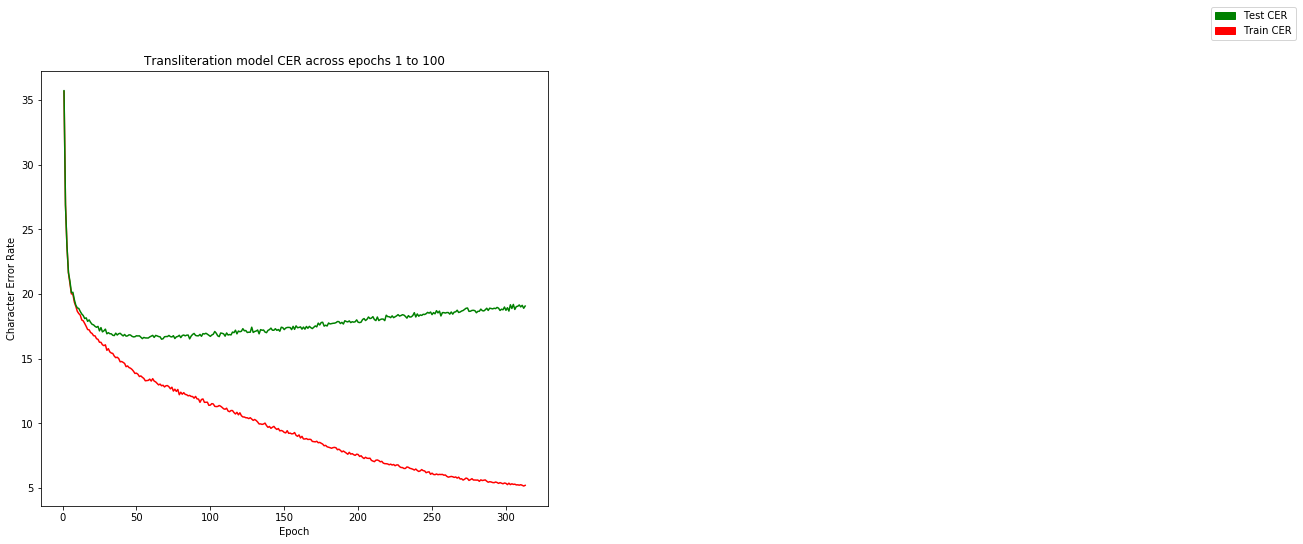

In [11]:
pylab.rcParams['figure.figsize'] = (20, 8)

plt.subplot(1, 2, 1)
plt.plot([i + 1 for i in range(len(testCERRecord[:]))], trainCERRecord[:], c = 'red')
plt.plot([i + 1 for i in range(len(testCERRecord[:]))], testCERRecord[:], c = 'green')    
axes = plt.gca()
# axes.set_xlim([1, 100])
# axes.set_ylim([5, 60])

red_patch   = mpatches.Patch(color = 'red',   label = 'Train CER')
green_patch = mpatches.Patch(color = 'green', label = 'Test CER')
plt.legend(handles=[green_patch, red_patch], bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.xlabel('Epoch')
plt.ylabel('Character Error Rate')
plt.title('Transliteration model CER across epochs 1 to 100')

print 'Test', '\t\t\t', 'Train'
print min(testCERRecord), np.argmin(testCERRecord), trainCERRecord[np.argmin(testCERRecord)]
print testCERRecord[np.argmin(trainCERRecord)], np.argmin(trainCERRecord), min(trainCERRecord)
# print trainPredictionFiles[np.argmin(testCERRecord)]

# GRU FOLD 1

In [16]:
fold = 1
testSourceFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/testMixed' + str(fold) + '.source.txt'
trainSourceFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/trainMixed' + str(fold) + '.source.txt'
testTargetFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/testMixed' + str(fold) + '.target.txt'
trainTargetFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/trainMixed' + str(fold) + '.target.txt'

with open(trainSourceFile, 'r') as fp:
    trainSource = fp.readlines()
    
for i in range(len(trainSource)):
    trainSource[i] = trainSource[i].strip('\n')
    string = ''
    for ch in trainSource[i].split(' '):
        if ch != '':
            string += revEnglishMap[int(ch)]
    trainSource[i] = string

with open(testSourceFile, 'r') as fp:
    testSource = fp.readlines()
    
for i in range(len(testSource)):
    testSource[i] = testSource[i].strip('\n')
    string = ''
    for ch in testSource[i].split(' '):
        if ch != '':
            string += revEnglishMap[int(ch)]
    testSource[i] = string

with open(trainTargetFile, 'r') as fp:
    trainTarget = fp.readlines()
    
for i in range(len(trainTarget)):
    trainTarget[i] = trainTarget[i].strip('\n')
    string = ''
    for ch in trainTarget[i].split(' '):
        if ch != '':
            string += devanagariChars[int(ch)]
    trainTarget[i] = string

with open(testTargetFile, 'r') as fp:
    testTarget = fp.readlines()
    
for i in range(len(testTarget)):
    testTarget[i] = testTarget[i].strip('\n')
    string = ''
    for ch in testTarget[i].split(' '):
        if ch != '':
            string += devanagariChars[int(ch)]
    testTarget[i] = string

In [17]:
checkPoints = [101101, 173893, 245337, 318129, 39093, 102449, 175241, 246685, 319477, 392269, 103797, 17525, 248033, 320825, 393617, 105145, 176589, 249381, 322173, 394965, 106493, 177937, 250729, 323521, 396313, 107841, 179285, 252077, 32353, 397661, 10785, 180633, 253425, 324869, 40441, 109189, 181981, 254773, 326217, 4045, 110537, 183329, 256121, 327565, 41789, 111885, 184677, 25613, 328913, 43137, 113233, 186025, 257469, 330261, 44485, 114581, 187373, 258817, 331609, 45833, 115929, 188721, 260165, 332957, 47181, 117277, 18873, 261513, 334305, 48529, 118625, 190069, 262861, 335653, 49877, 119973, 191417, 264209, 337001, 51225, 121321, 192765, 265557, 33701, 52573, 12133, 194113, 266905, 338349, 53921, 122669, 195461, 268253, 339697, 5393, 124017, 196809, 269601, 341045, 55269, 125365, 198157, 26961, 342393, 56617, 126713, 199505, 2697, 343741, 57965, 128061, 1, 270949, 345089, 59313, 129409, 200853, 272297, 346437, 60661, 130757, 202201, 273645, 347785, 62009, 132105, 20221, 274993, 349133, 63357, 133453, 203549, 276341, 350481, 64705, 134801, 204897, 277689, 35049, 66053, 13481, 206245, 279037, 351829, 67401, 1349, 207593, 280385, 353177, 6741, 136149, 208941, 281733, 354525, 68749, 137497, 210289, 283081, 355873, 70097, 138845, 211637, 28309, 357221, 71445, 140193, 212985, 284429, 358569, 72793, 141541, 214333, 285777, 359917, 74141, 142889, 215681, 287125, 361265, 75489, 144237, 21569, 288473, 362613, 76837, 145585, 217029, 289821, 363961, 78185, 146933, 218377, 291169, 36397, 79533, 148281, 219725, 292517, 365309, 80881, 14829, 221073, 293865, 366657, 8089, 149629, 222421, 295213, 368005, 82229, 150977, 223769, 296561, 369353, 83577, 152325, 225117, 29657, 370701, 84925, 153673, 226465, 297909, 372049, 86273, 155021, 227813, 299257, 373397, 87621, 156369, 229161, 300605, 374745, 88969, 157717, 22917, 301953, 376093, 90317, 159065, 230509, 303301, 377441, 91665, 160413, 231857, 304649, 37745, 93013, 161761, 233205, 305997, 378789, 94361, 16177, 234553, 307345, 380137, 9437, 163109, 235901, 308693, 381485, 95709, 164457, 237249, 310041, 382833, 97057, 165805, 238597, 31005, 384181, 98405, 167153, 239945, 311389, 385529, 99753, 168501, 241293, 312737, 386877, 169849, 242641, 314085, 388225, 171197, 24265, 315433, 389573, 172545, 243989, 316781, 390921]
checkPoints = sorted(checkPoints)

trainPredictionFiles = ['/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_' + str(fold) + '/predTrain/predictions' + str(ckp) + '.txt' for ckp in checkPoints]
testPredictionFiles = ['/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_' + str(fold) + '/predTest/predictions' + str(ckp) + '.txt' for ckp in checkPoints]

trainCERRecord = []
for fileName in trainPredictionFiles[2:]:
    

    if trainPredictionFiles.index(fileName) % 50 == 0:
        print fileName
        
    with open(fileName, 'r') as fp:
        trainPredicted = fp.readlines()

    for i in range(len(trainPredicted)):
        trainPredicted[i] = trainPredicted[i].strip('\n')
        string = ''
        for ch in trainPredicted[i].split(' '):
            if ch != '':
                string += devanagariChars[int(ch)]
        trainPredicted[i] = string
    
    CER = 0.
    for i in range(len(trainPredicted)):
        CER += (float(editdistance.eval(trainTarget[i], trainPredicted[i])) / len(trainTarget[i]))
    CER /= len(trainPredicted)
    CER *= 100
    trainCERRecord.append(CER)

testCERRecord = []

for fileName in testPredictionFiles[2: ]:

    if testPredictionFiles.index(fileName) % 50 == 0:
        print fileName
        
    with open(fileName, 'r') as fp:
        testPredicted = fp.readlines()
    
    for i in range(len(testPredicted)):
        testPredicted[i] = testPredicted[i].strip('\n')
        string = ''
        for ch in testPredicted[i].split(' '):
            if ch != '':
                string += devanagariChars[int(ch)]
        testPredicted[i] = string
    
    CER = 0.
    for i in range(len(testPredicted)):
        CER += (float(editdistance.eval(testTarget[i], testPredicted[i])) / len(testTarget[i]))
    CER /= len(testPredicted)
    CER *= 100
    testCERRecord.append(CER)

/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_1/predTrain/predictions67401.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_1/predTrain/predictions134801.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_1/predTrain/predictions202201.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_1/predTrain/predictions269601.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_1/predTrain/predictions337001.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_1/predTest/predictions67401.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_1/predTest/predictions134801.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbeddin

Test 			Train
16.6296657921 68 11.9382578149
19.4125774758 290 4.492653217


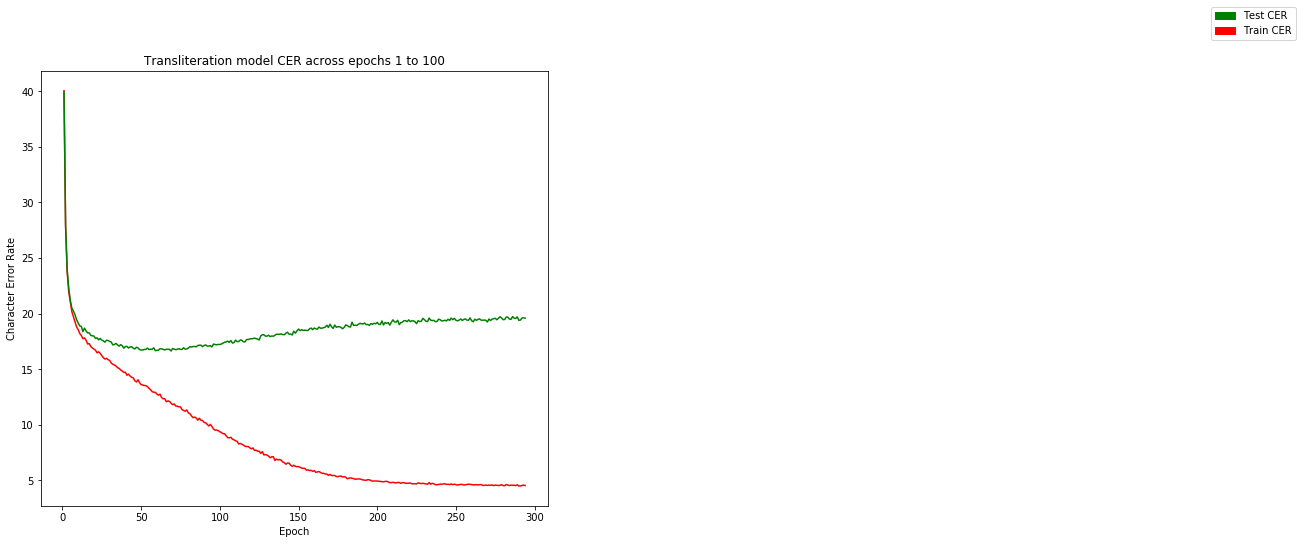

In [18]:
pylab.rcParams['figure.figsize'] = (20, 8)

plt.subplot(1, 2, 1)
plt.plot([i + 1 for i in range(len(testCERRecord[:]))], trainCERRecord[:], c = 'red')
plt.plot([i + 1 for i in range(len(testCERRecord[:]))], testCERRecord[:], c = 'green')    
axes = plt.gca()
# axes.set_xlim([1, 100])
# axes.set_ylim([5, 60])

red_patch   = mpatches.Patch(color = 'red',   label = 'Train CER')
green_patch = mpatches.Patch(color = 'green', label = 'Test CER')
plt.legend(handles=[green_patch, red_patch], bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.xlabel('Epoch')
plt.ylabel('Character Error Rate')
plt.title('Transliteration model CER across epochs 1 to 100')

print 'Test', '\t\t\t', 'Train'
print min(testCERRecord), np.argmin(testCERRecord), trainCERRecord[np.argmin(testCERRecord)]
print testCERRecord[np.argmin(trainCERRecord)], np.argmin(trainCERRecord), min(trainCERRecord)
# print trainPredictionFiles[np.argmin(testCERRecord)]


# GRU Fold 2

In [19]:
fold = 2
testSourceFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/testMixed' + str(fold) + '.source.txt'
trainSourceFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/trainMixed' + str(fold) + '.source.txt'
testTargetFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/testMixed' + str(fold) + '.target.txt'
trainTargetFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/trainMixed' + str(fold) + '.target.txt'

with open(trainSourceFile, 'r') as fp:
    trainSource = fp.readlines()
    
for i in range(len(trainSource)):
    trainSource[i] = trainSource[i].strip('\n')
    string = ''
    for ch in trainSource[i].split(' '):
        if ch != '':
            string += revEnglishMap[int(ch)]
    trainSource[i] = string

with open(testSourceFile, 'r') as fp:
    testSource = fp.readlines()
    
for i in range(len(testSource)):
    testSource[i] = testSource[i].strip('\n')
    string = ''
    for ch in testSource[i].split(' '):
        if ch != '':
            string += revEnglishMap[int(ch)]
    testSource[i] = string

with open(trainTargetFile, 'r') as fp:
    trainTarget = fp.readlines()
    
for i in range(len(trainTarget)):
    trainTarget[i] = trainTarget[i].strip('\n')
    string = ''
    for ch in trainTarget[i].split(' '):
        if ch != '':
            string += devanagariChars[int(ch)]
    trainTarget[i] = string

with open(testTargetFile, 'r') as fp:
    testTarget = fp.readlines()
    
for i in range(len(testTarget)):
    testTarget[i] = testTarget[i].strip('\n')
    string = ''
    for ch in testTarget[i].split(' '):
        if ch != '':
            string += devanagariChars[int(ch)]
    testTarget[i] = string

In [20]:
checkPoints = [101101, 172545, 24265, 314085, 386877, 102449, 173893, 243989, 315433, 388225, 103797, 175241, 245337, 316781, 389573, 105145, 17525, 246685, 318129, 390921, 106493, 176589, 248033, 319477, 39093, 107841, 177937, 249381, 320825, 392269, 10785, 179285, 250729, 322173, 40441, 109189, 180633, 252077, 323521, 4045, 110537, 181981, 253425, 32353, 41789, 111885, 183329, 254773, 324869, 43137, 113233, 184677, 256121, 326217, 44485, 114581, 186025, 25613, 327565, 45833, 115929, 187373, 257469, 328913, 47181, 117277, 188721, 258817, 330261, 48529, 118625, 18873, 260165, 331609, 49877, 119973, 190069, 261513, 332957, 51225, 121321, 191417, 262861, 334305, 52573, 12133, 192765, 264209, 335653, 53921, 122669, 194113, 265557, 337001, 5393, 124017, 195461, 266905, 33701, 55269, 125365, 196809, 268253, 338349, 56617, 126713, 198157, 269601, 339697, 57965, 128061, 199505, 26961, 341045, 59313, 129409, 1, 2697, 342393, 60661, 130757, 200853, 270949, 343741, 62009, 132105, 202201, 272297, 345089, 63357, 133453, 20221, 273645, 346437, 64705, 134801, 203549, 274993, 347785, 66053, 13481, 204897, 276341, 349133, 67401, 1349, 206245, 277689, 350481, 6741, 136149, 207593, 279037, 35049, 68749, 137497, 208941, 280385, 351829, 70097, 138845, 210289, 281733, 353177, 71445, 140193, 211637, 283081, 354525, 72793, 141541, 212985, 28309, 355873, 74141, 142889, 214333, 284429, 357221, 75489, 144237, 215681, 285777, 358569, 76837, 145585, 21569, 287125, 359917, 78185, 146933, 217029, 288473, 361265, 79533, 148281, 218377, 289821, 362613, 80881, 14829, 219725, 291169, 363961, 8089, 149629, 221073, 292517, 36397, 82229, 150977, 222421, 293865, 365309, 83577, 152325, 223769, 295213, 366657, 84925, 153673, 225117, 296561, 368005, 86273, 155021, 226465, 29657, 369353, 87621, 156369, 227813, 297909, 370701, 88969, 157717, 229161, 299257, 372049, 90317, 159065, 22917, 300605, 373397, 91665, 160413, 230509, 301953, 374745, 93013, 161761, 231857, 303301, 376093, 94361, 16177, 233205, 304649, 377441, 9437, 163109, 234553, 305997, 37745, 95709, 164457, 235901, 307345, 378789, 97057, 165805, 237249, 308693, 380137, 98405, 167153, 238597, 310041, 381485, 99753, 168501, 239945, 31005, 382833, 169849, 241293, 311389, 384181, 171197, 242641, 312737, 385529]
checkPoints = sorted(checkPoints)

trainPredictionFiles = ['/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_' + str(fold) + '/predTrain/predictions' + str(ckp) + '.txt' for ckp in checkPoints]
testPredictionFiles = ['/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_' + str(fold) + '/predTest/predictions' + str(ckp) + '.txt' for ckp in checkPoints]

trainCERRecord = []
for fileName in trainPredictionFiles[2:]:
    

    if trainPredictionFiles.index(fileName) % 50 == 0:
        print fileName
        
    with open(fileName, 'r') as fp:
        trainPredicted = fp.readlines()

    for i in range(len(trainPredicted)):
        trainPredicted[i] = trainPredicted[i].strip('\n')
        string = ''
        for ch in trainPredicted[i].split(' '):
            if ch != '':
                string += devanagariChars[int(ch)]
        trainPredicted[i] = string
    
    CER = 0.
    for i in range(len(trainPredicted)):
        CER += (float(editdistance.eval(trainTarget[i], trainPredicted[i])) / len(trainTarget[i]))
    CER /= len(trainPredicted)
    CER *= 100
    trainCERRecord.append(CER)

testCERRecord = []

for fileName in testPredictionFiles[2: ]:

    if testPredictionFiles.index(fileName) % 50 == 0:
        print fileName
        
    with open(fileName, 'r') as fp:
        testPredicted = fp.readlines()
    
    for i in range(len(testPredicted)):
        testPredicted[i] = testPredicted[i].strip('\n')
        string = ''
        for ch in testPredicted[i].split(' '):
            if ch != '':
                string += devanagariChars[int(ch)]
        testPredicted[i] = string
    
    CER = 0.
    for i in range(len(testPredicted)):
        CER += (float(editdistance.eval(testTarget[i], testPredicted[i])) / len(testTarget[i]))
    CER /= len(testPredicted)
    CER *= 100
    testCERRecord.append(CER)

/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_2/predTrain/predictions67401.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_2/predTrain/predictions134801.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_2/predTrain/predictions202201.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_2/predTrain/predictions269601.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_2/predTrain/predictions337001.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_2/predTest/predictions67401.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_2/predTest/predictions134801.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbeddin

Test 			Train
16.3807343575 66 12.429128605
19.0504805871 287 4.42094427616


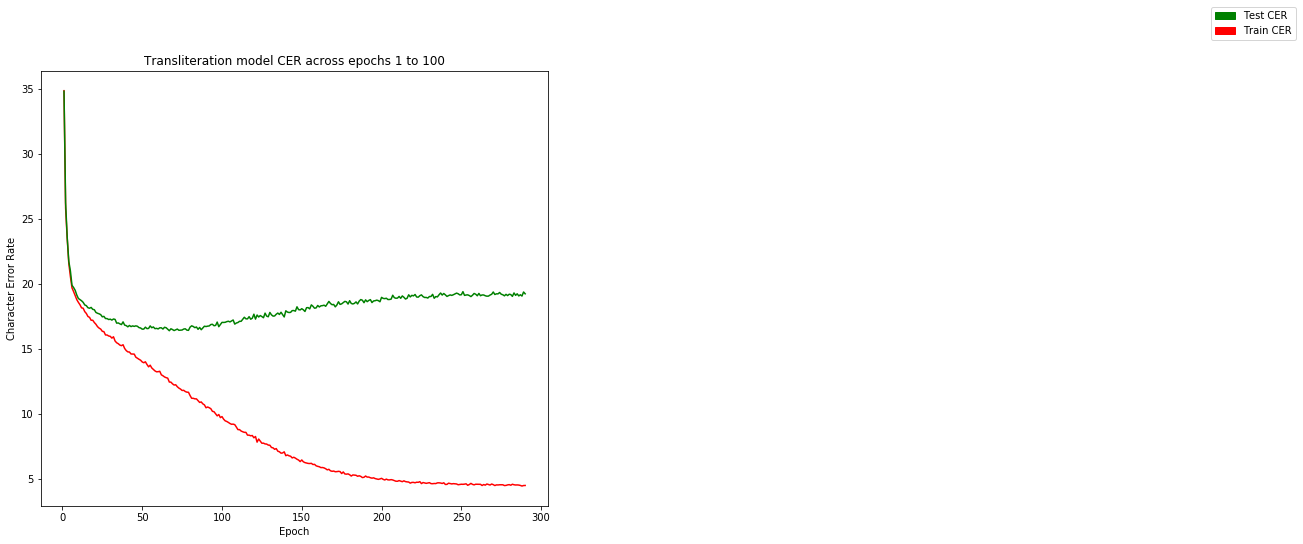

In [21]:
pylab.rcParams['figure.figsize'] = (20, 8)

plt.subplot(1, 2, 1)
plt.plot([i + 1 for i in range(len(testCERRecord[:]))], trainCERRecord[:], c = 'red')
plt.plot([i + 1 for i in range(len(testCERRecord[:]))], testCERRecord[:], c = 'green')    
axes = plt.gca()
# axes.set_xlim([1, 100])
# axes.set_ylim([5, 60])

red_patch   = mpatches.Patch(color = 'red',   label = 'Train CER')
green_patch = mpatches.Patch(color = 'green', label = 'Test CER')
plt.legend(handles=[green_patch, red_patch], bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.xlabel('Epoch')
plt.ylabel('Character Error Rate')
plt.title('Transliteration model CER across epochs 1 to 100')

print 'Test', '\t\t\t', 'Train'
print min(testCERRecord), np.argmin(testCERRecord), trainCERRecord[np.argmin(testCERRecord)]
print testCERRecord[np.argmin(trainCERRecord)], np.argmin(trainCERRecord), min(trainCERRecord)
# print trainPredictionFiles[np.argmin(testCERRecord)]



# GRU Fold 3

In [22]:
fold = 3
testSourceFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/testMixed' + str(fold) + '.source.txt'
trainSourceFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/trainMixed' + str(fold) + '.source.txt'
testTargetFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/testMixed' + str(fold) + '.target.txt'
trainTargetFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/trainMixed' + str(fold) + '.target.txt'

with open(trainSourceFile, 'r') as fp:
    trainSource = fp.readlines()
    
for i in range(len(trainSource)):
    trainSource[i] = trainSource[i].strip('\n')
    string = ''
    for ch in trainSource[i].split(' '):
        if ch != '':
            string += revEnglishMap[int(ch)]
    trainSource[i] = string

with open(testSourceFile, 'r') as fp:
    testSource = fp.readlines()
    
for i in range(len(testSource)):
    testSource[i] = testSource[i].strip('\n')
    string = ''
    for ch in testSource[i].split(' '):
        if ch != '':
            string += revEnglishMap[int(ch)]
    testSource[i] = string

with open(trainTargetFile, 'r') as fp:
    trainTarget = fp.readlines()
    
for i in range(len(trainTarget)):
    trainTarget[i] = trainTarget[i].strip('\n')
    string = ''
    for ch in trainTarget[i].split(' '):
        if ch != '':
            string += devanagariChars[int(ch)]
    trainTarget[i] = string

with open(testTargetFile, 'r') as fp:
    testTarget = fp.readlines()
    
for i in range(len(testTarget)):
    testTarget[i] = testTarget[i].strip('\n')
    string = ''
    for ch in testTarget[i].split(' '):
        if ch != '':
            string += devanagariChars[int(ch)]
    testTarget[i] = string

In [24]:
checkPoints = [101102, 171198, 241294, 310042, 380138, 102450, 172546, 242642, 31006, 381486, 103798, 173894, 24266, 311390, 382834, 105146, 175242, 243990, 312738, 384182, 106494, 17526, 245338, 314086, 385530, 107842, 176590, 246686, 315434, 386878, 10786, 177938, 248034, 316782, 39094, 109190, 179286, 249382, 318130, 40442, 110538, 180634, 250730, 319478, 4046, 111886, 181982, 252078, 320826, 41790, 113234, 183330, 253426, 322174, 43138, 114582, 184678, 254774, 323522, 44486, 115930, 186026, 256122, 32354, 45834, 117278, 187374, 25614, 324870, 47182, 118626, 188722, 257470, 326218, 48530, 119974, 18874, 258818, 327566, 49878, 121322, 190070, 260166, 328914, 51226, 12134, 191418, 261514, 330262, 52574, 122670, 192766, 262862, 331610, 53922, 124018, 194114, 264210, 332958, 5394, 125366, 195462, 265558, 334306, 55270, 126714, 196810, 266906, 335654, 56618, 128062, 198158, 268254, 337002, 57966, 129410, 199506, 269602, 33702, 59314, 130758, 1, 26962, 338350, 60662, 132106, 200854, 2698, 339698, 62010, 133454, 202202, 270950, 341046, 63358, 134802, 20222, 272298, 342394, 64706, 13482, 203550, 273646, 343742, 66054, 1350, 204898, 274994, 345090, 67402, 136150, 206246, 276342, 346438, 6742, 137498, 207594, 277690, 347786, 68750, 138846, 208942, 279038, 349134, 70098, 140194, 210290, 280386, 350482, 71446, 141542, 211638, 281734, 35050, 72794, 142890, 212986, 283082, 351830, 74142, 144238, 214334, 28310, 353178, 75490, 145586, 215682, 284430, 354526, 76838, 146934, 21570, 285778, 355874, 78186, 148282, 217030, 287126, 357222, 79534, 14830, 218378, 288474, 358570, 80882, 149630, 219726, 289822, 359918, 8090, 150978, 221074, 291170, 361266, 82230, 152326, 222422, 292518, 362614, 83578, 153674, 223770, 293866, 363962, 84926, 155022, 225118, 295214, 36398, 86274, 156370, 226466, 296562, 365310, 87622, 157718, 227814, 29658, 366658, 88970, 159066, 229162, 297910, 368006, 90318, 160414, 22918, 299258, 369354, 91666, 161762, 230510, 2, 370702, 93014, 16178, 231858, 300606, 372050, 94362, 163110, 233206, 301954, 373398, 9438, 164458, 234554, 303302, 374746, 95710, 165806, 235902, 304650, 376094, 97058, 167154, 237250, 305998, 377442, 98406, 168502, 238598, 307346, 37746, 99754, 169850, 239946, 308694, 378790]
checkPoints = sorted(checkPoints)

trainPredictionFiles = ['/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_' + str(fold) + '/predTrain/predictions' + str(ckp) + '.txt' for ckp in checkPoints]
testPredictionFiles = ['/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_' + str(fold) + '/predTest/predictions' + str(ckp) + '.txt' for ckp in checkPoints]

trainCERRecord = []
for fileName in trainPredictionFiles[2:]:
    

    if trainPredictionFiles.index(fileName) % 50 == 0:
        print fileName
        
    with open(fileName, 'r') as fp:
        trainPredicted = fp.readlines()

    for i in range(len(trainPredicted)):
        trainPredicted[i] = trainPredicted[i].strip('\n')
        string = ''
        for ch in trainPredicted[i].split(' '):
            if ch != '':
                string += devanagariChars[int(ch)]
        trainPredicted[i] = string
    
    CER = 0.
    for i in range(len(trainPredicted)):
        CER += (float(editdistance.eval(trainTarget[i], trainPredicted[i])) / len(trainTarget[i]))
    CER /= len(trainPredicted)
    CER *= 100
    trainCERRecord.append(CER)

testCERRecord = []

for fileName in testPredictionFiles[2: ]:

    if testPredictionFiles.index(fileName) % 50 == 0:
        print fileName
        
    with open(fileName, 'r') as fp:
        testPredicted = fp.readlines()
    
    for i in range(len(testPredicted)):
        testPredicted[i] = testPredicted[i].strip('\n')
        string = ''
        for ch in testPredicted[i].split(' '):
            if ch != '':
                string += devanagariChars[int(ch)]
        testPredicted[i] = string
    
    CER = 0.
    for i in range(len(testPredicted)):
        CER += (float(editdistance.eval(testTarget[i], testPredicted[i])) / len(testTarget[i]))
    CER /= len(testPredicted)
    CER *= 100
    testCERRecord.append(CER)

/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_3/predTrain/predictions66054.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_3/predTrain/predictions133454.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_3/predTrain/predictions200854.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_3/predTrain/predictions268254.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_3/predTrain/predictions335654.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_3/predTest/predictions66054.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_3/predTest/predictions133454.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbeddin

Test 			Train
16.8799424076 60 12.7521800935
19.505384772 281 4.44754082737


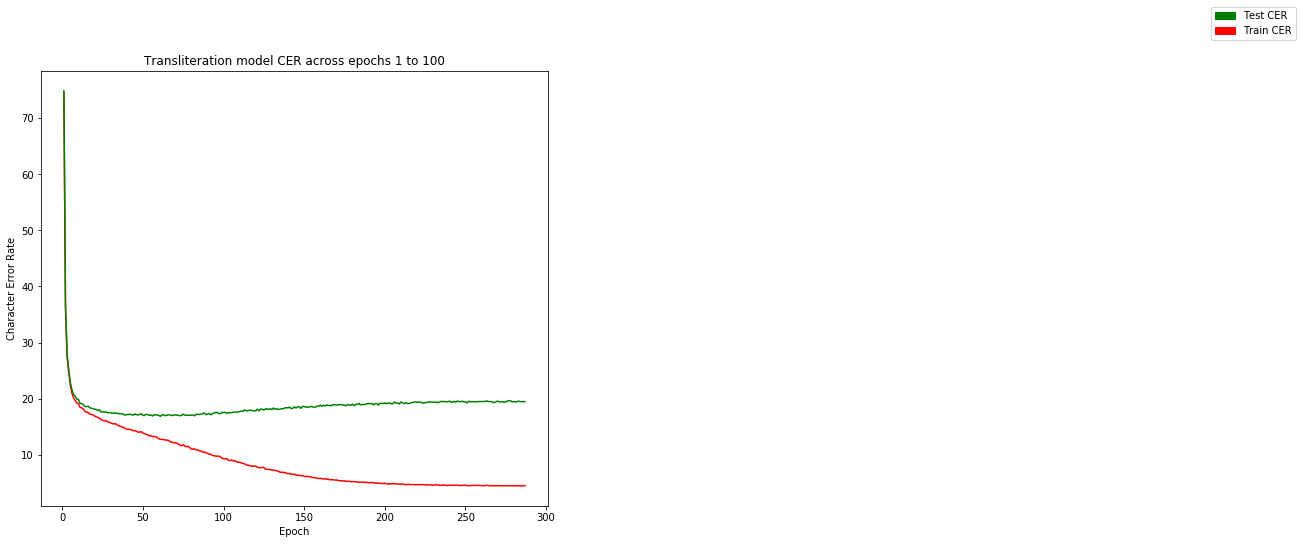

In [25]:
pylab.rcParams['figure.figsize'] = (20, 8)

plt.subplot(1, 2, 1)
plt.plot([i + 1 for i in range(len(testCERRecord[:]))], trainCERRecord[:], c = 'red')
plt.plot([i + 1 for i in range(len(testCERRecord[:]))], testCERRecord[:], c = 'green')    
axes = plt.gca()
# axes.set_xlim([1, 100])
# axes.set_ylim([5, 60])

red_patch   = mpatches.Patch(color = 'red',   label = 'Train CER')
green_patch = mpatches.Patch(color = 'green', label = 'Test CER')
plt.legend(handles=[green_patch, red_patch], bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.xlabel('Epoch')
plt.ylabel('Character Error Rate')
plt.title('Transliteration model CER across epochs 1 to 100')

print 'Test', '\t\t\t', 'Train'
print min(testCERRecord), np.argmin(testCERRecord), trainCERRecord[np.argmin(testCERRecord)]
print testCERRecord[np.argmin(trainCERRecord)], np.argmin(trainCERRecord), min(trainCERRecord)
# print trainPredictionFiles[np.argmin(testCERRecord)]


# GRU Fold 4

In [26]:
fold = 4
testSourceFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/testMixed' + str(fold) + '.source.txt'
trainSourceFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/trainMixed' + str(fold) + '.source.txt'
testTargetFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/testMixed' + str(fold) + '.target.txt'
trainTargetFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/trainMixed' + str(fold) + '.target.txt'

with open(trainSourceFile, 'r') as fp:
    trainSource = fp.readlines()
    
for i in range(len(trainSource)):
    trainSource[i] = trainSource[i].strip('\n')
    string = ''
    for ch in trainSource[i].split(' '):
        if ch != '':
            string += revEnglishMap[int(ch)]
    trainSource[i] = string

with open(testSourceFile, 'r') as fp:
    testSource = fp.readlines()
    
for i in range(len(testSource)):
    testSource[i] = testSource[i].strip('\n')
    string = ''
    for ch in testSource[i].split(' '):
        if ch != '':
            string += revEnglishMap[int(ch)]
    testSource[i] = string

with open(trainTargetFile, 'r') as fp:
    trainTarget = fp.readlines()
    
for i in range(len(trainTarget)):
    trainTarget[i] = trainTarget[i].strip('\n')
    string = ''
    for ch in trainTarget[i].split(' '):
        if ch != '':
            string += devanagariChars[int(ch)]
    trainTarget[i] = string

with open(testTargetFile, 'r') as fp:
    testTarget = fp.readlines()
    
for i in range(len(testTarget)):
    testTarget[i] = testTarget[i].strip('\n')
    string = ''
    for ch in testTarget[i].split(' '):
        if ch != '':
            string += devanagariChars[int(ch)]
    testTarget[i] = string

In [27]:
checkPoints = [101101, 172545, 24265, 314085, 386877, 102449, 173893, 243989, 315433, 388225, 103797, 175241, 245337, 316781, 389573, 105145, 17525, 246685, 318129, 390921, 106493, 176589, 248033, 319477, 39093, 107841, 177937, 249381, 320825, 40441, 10785, 179285, 250729, 322173, 4045, 109189, 180633, 252077, 323521, 41789, 110537, 181981, 253425, 32353, 43137, 111885, 183329, 254773, 324869, 44485, 113233, 184677, 256121, 326217, 45833, 114581, 186025, 25613, 327565, 47181, 115929, 187373, 257469, 328913, 48529, 117277, 188721, 258817, 330261, 49877, 118625, 18873, 260165, 331609, 51225, 119973, 190069, 261513, 332957, 52573, 121321, 191417, 262861, 334305, 53921, 12133, 192765, 264209, 335653, 5393, 122669, 194113, 265557, 337001, 55269, 124017, 195461, 266905, 33701, 56617, 125365, 196809, 268253, 338349, 57965, 126713, 198157, 269601, 339697, 59313, 128061, 199505, 26961, 341045, 60661, 129409, 1, 2697, 342393, 62009, 130757, 200853, 270949, 343741, 63357, 132105, 202201, 272297, 345089, 64705, 133453, 20221, 273645, 346437, 66053, 134801, 203549, 274993, 347785, 67401, 13481, 204897, 276341, 349133, 6741, 1349, 206245, 277689, 350481, 68749, 136149, 207593, 279037, 35049, 70097, 137497, 208941, 280385, 351829, 71445, 138845, 210289, 281733, 353177, 72793, 140193, 211637, 283081, 354525, 74141, 141541, 212985, 28309, 355873, 75489, 142889, 214333, 284429, 357221, 76837, 144237, 215681, 285777, 358569, 78185, 145585, 21569, 287125, 359917, 79533, 146933, 217029, 288473, 361265, 80881, 148281, 218377, 289821, 362613, 8089, 14829, 219725, 291169, 363961, 82229, 149629, 221073, 292517, 36397, 83577, 150977, 222421, 293865, 365309, 84925, 152325, 223769, 295213, 366657, 86273, 153673, 225117, 296561, 368005, 87621, 155021, 226465, 29657, 369353, 88969, 156369, 227813, 297909, 370701, 90317, 157717, 229161, 299257, 372049, 91665, 159065, 22917, 300605, 373397, 93013, 160413, 230509, 301953, 374745, 94361, 161761, 231857, 303301, 376093, 9437, 16177, 233205, 304649, 377441, 95709, 163109, 234553, 305997, 37745, 97057, 164457, 235901, 307345, 378789, 98405, 165805, 237249, 308693, 380137, 99753, 167153, 238597, 310041, 381485, 168501, 239945, 31005, 382833, 169849, 241293, 311389, 384181, 171197, 242641, 312737, 385529]
checkPoints = sorted(checkPoints)

trainPredictionFiles = ['/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_' + str(fold) + '/predTrain/predictions' + str(ckp) + '.txt' for ckp in checkPoints]
testPredictionFiles = ['/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_' + str(fold) + '/predTest/predictions' + str(ckp) + '.txt' for ckp in checkPoints]

trainCERRecord = []
for fileName in trainPredictionFiles[2:]:
    

    if trainPredictionFiles.index(fileName) % 50 == 0:
        print fileName
        
    with open(fileName, 'r') as fp:
        trainPredicted = fp.readlines()

    for i in range(len(trainPredicted)):
        trainPredicted[i] = trainPredicted[i].strip('\n')
        string = ''
        for ch in trainPredicted[i].split(' '):
            if ch != '':
                string += devanagariChars[int(ch)]
        trainPredicted[i] = string
    
    CER = 0.
    for i in range(len(trainPredicted)):
        CER += (float(editdistance.eval(trainTarget[i], trainPredicted[i])) / len(trainTarget[i]))
    CER /= len(trainPredicted)
    CER *= 100
    trainCERRecord.append(CER)

testCERRecord = []

for fileName in testPredictionFiles[2: ]:

    if testPredictionFiles.index(fileName) % 50 == 0:
        print fileName
        
    with open(fileName, 'r') as fp:
        testPredicted = fp.readlines()
    
    for i in range(len(testPredicted)):
        testPredicted[i] = testPredicted[i].strip('\n')
        string = ''
        for ch in testPredicted[i].split(' '):
            if ch != '':
                string += devanagariChars[int(ch)]
        testPredicted[i] = string
    
    CER = 0.
    for i in range(len(testPredicted)):
        CER += (float(editdistance.eval(testTarget[i], testPredicted[i])) / len(testTarget[i]))
    CER /= len(testPredicted)
    CER *= 100
    testCERRecord.append(CER)

/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_4/predTrain/predictions67401.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_4/predTrain/predictions134801.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_4/predTrain/predictions202201.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_4/predTrain/predictions269601.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_4/predTrain/predictions337001.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_4/predTest/predictions67401.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_4/predTest/predictions134801.txt
/home/kushagras/tmp/GRU_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbeddin

Test 			Train
16.3099905648 75 11.5673861448
19.1577527366 275 4.5015696637


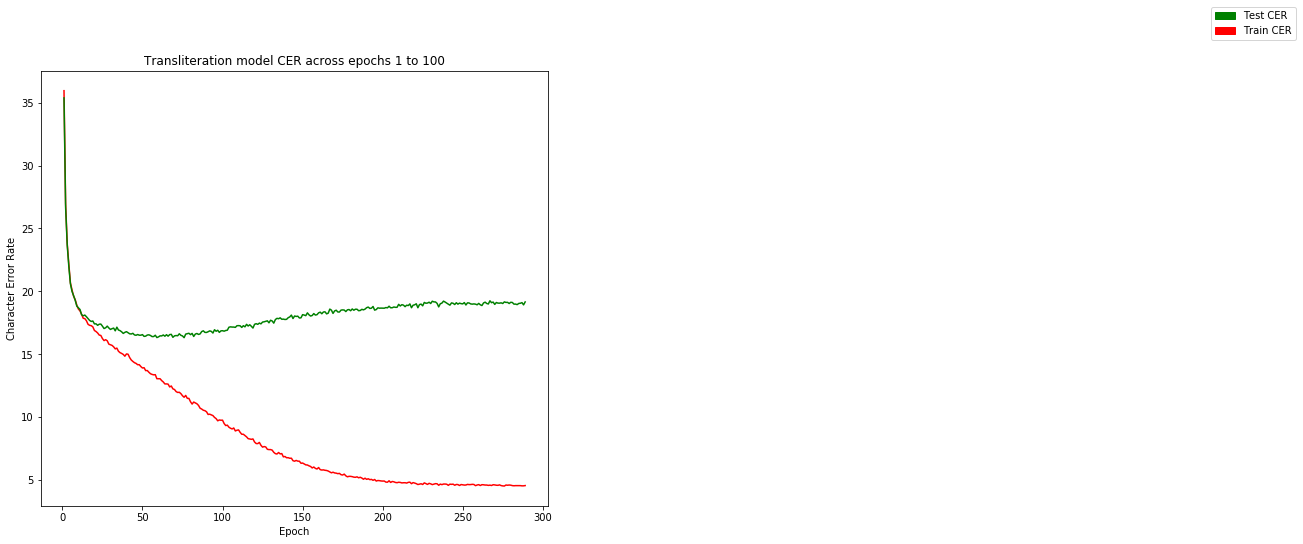

In [28]:
pylab.rcParams['figure.figsize'] = (20, 8)

plt.subplot(1, 2, 1)
plt.plot([i + 1 for i in range(len(testCERRecord[:]))], trainCERRecord[:], c = 'red')
plt.plot([i + 1 for i in range(len(testCERRecord[:]))], testCERRecord[:], c = 'green')    
axes = plt.gca()
# axes.set_xlim([1, 100])
# axes.set_ylim([5, 60])

red_patch   = mpatches.Patch(color = 'red',   label = 'Train CER')
green_patch = mpatches.Patch(color = 'green', label = 'Test CER')
plt.legend(handles=[green_patch, red_patch], bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.xlabel('Epoch')
plt.ylabel('Character Error Rate')
plt.title('Transliteration model CER across epochs 1 to 100')

print 'Test', '\t\t\t', 'Train'
print min(testCERRecord), np.argmin(testCERRecord), trainCERRecord[np.argmin(testCERRecord)]
print testCERRecord[np.argmin(trainCERRecord)], np.argmin(trainCERRecord), min(trainCERRecord)
# print trainPredictionFiles[np.argmin(testCERRecord)]

# Compiling results for GRU model

In [29]:
# 16.5001839244 12.899906905
# 16.6296657921 11.9382578149
# 16.3807343575 12.429128605
# 16.8799424076 12.7521800935
# 16.3099905648 11.5673861448


testErrorFolds = [16.5001839244, 16.6296657921, 16.3807343575, 16.8799424076, 16.3099905648]
trainErrorFolds = [12.899906905, 11.9382578149, 12.429128605, 12.7521800935, 11.5673861448]

print np.average(testErrorFolds), np.average(trainErrorFolds)

16.5401034093 12.3173719126


# LSTM Fold 0

/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_0/predTrain/predictions67401.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_0/predTrain/predictions134801.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_0/predTrain/predictions202201.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_0/predTrain/predictions269601.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_0/predTrain/predictions337001.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_0/predTest/predictions67401.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_0/predTest/predictions134801.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_Large

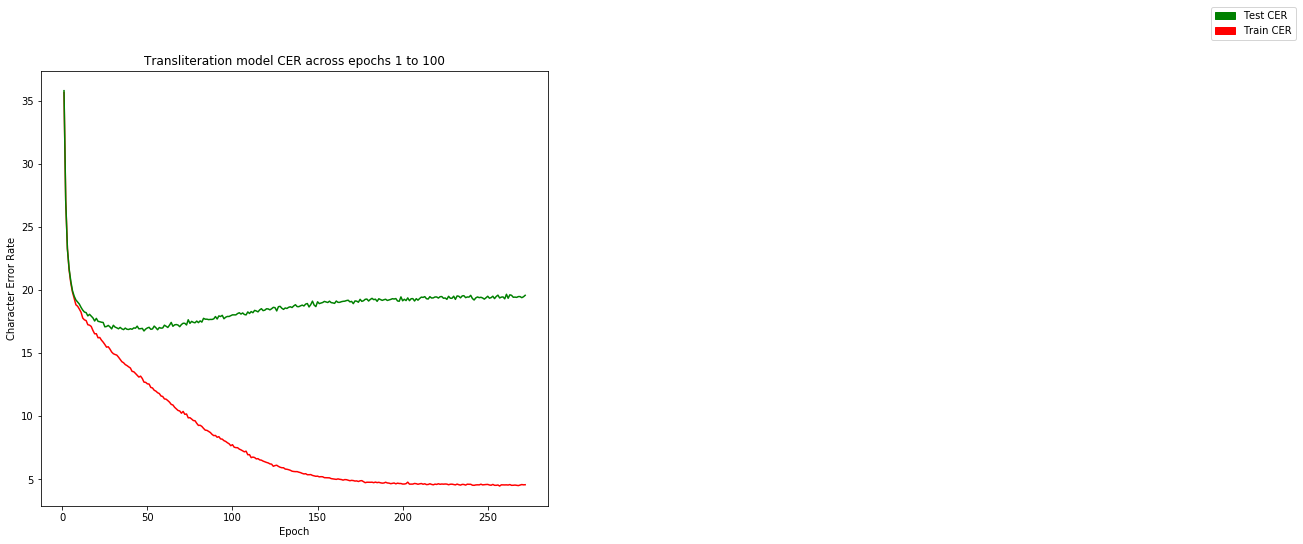

In [30]:
fold = 0
testSourceFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/testMixed' + str(fold) + '.source.txt'
trainSourceFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/trainMixed' + str(fold) + '.source.txt'
testTargetFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/testMixed' + str(fold) + '.target.txt'
trainTargetFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/trainMixed' + str(fold) + '.target.txt'

with open(trainSourceFile, 'r') as fp:
    trainSource = fp.readlines()
    
for i in range(len(trainSource)):
    trainSource[i] = trainSource[i].strip('\n')
    string = ''
    for ch in trainSource[i].split(' '):
        if ch != '':
            string += revEnglishMap[int(ch)]
    trainSource[i] = string

with open(testSourceFile, 'r') as fp:
    testSource = fp.readlines()
    
for i in range(len(testSource)):
    testSource[i] = testSource[i].strip('\n')
    string = ''
    for ch in testSource[i].split(' '):
        if ch != '':
            string += revEnglishMap[int(ch)]
    testSource[i] = string

with open(trainTargetFile, 'r') as fp:
    trainTarget = fp.readlines()
    
for i in range(len(trainTarget)):
    trainTarget[i] = trainTarget[i].strip('\n')
    string = ''
    for ch in trainTarget[i].split(' '):
        if ch != '':
            string += devanagariChars[int(ch)]
    trainTarget[i] = string

with open(testTargetFile, 'r') as fp:
    testTarget = fp.readlines()
    
for i in range(len(testTarget)):
    testTarget[i] = testTarget[i].strip('\n')
    string = ''
    for ch in testTarget[i].split(' '):
        if ch != '':
            string += devanagariChars[int(ch)]
    testTarget[i] = string
    
checkPoints = [101101, 167153, 233205, 299257, 366657, 102449, 168501, 234553, 300605, 368005, 103797, 169849, 235901, 301953, 37745, 105145, 171197, 237249, 303301, 39093, 106493, 172545, 238597, 304649, 40441, 107841, 173893, 239945, 305997, 4045, 10785, 175241, 241293, 307345, 41789, 109189, 17525, 242641, 308693, 43137, 110537, 176589, 24265, 310041, 44485, 111885, 177937, 243989, 31005, 45833, 113233, 179285, 245337, 311389, 47181, 114581, 180633, 246685, 312737, 48529, 115929, 181981, 248033, 314085, 49877, 117277, 183329, 249381, 315433, 51225, 118625, 184677, 250729, 316781, 52573, 119973, 186025, 252077, 318129, 53921, 121321, 187373, 253425, 319477, 5393, 12133, 188721, 254773, 320825, 55269, 122669, 18873, 256121, 322173, 56617, 124017, 190069, 25613, 323521, 57965, 125365, 191417, 257469, 32353, 59313, 126713, 192765, 258817, 324869, 60661, 128061, 194113, 260165, 326217, 62009, 129409, 195461, 261513, 327565, 63357, 130757, 196809, 262861, 328913, 64705, 132105, 198157, 264209, 330261, 66053, 133453, 199505, 265557, 331609, 67401, 134801, 1, 266905, 332957, 6741, 13481, 200853, 268253, 334305, 68749, 1349, 202201, 269601, 335653, 70097, 136149, 20221, 26961, 337001, 71445, 137497, 203549, 2697, 33701, 72793, 138845, 204897, 270949, 338349, 74141, 140193, 206245, 272297, 339697, 75489, 141541, 207593, 273645, 341045, 76837, 142889, 208941, 274993, 342393, 78185, 144237, 210289, 276341, 343741, 79533, 145585, 211637, 277689, 345089, 80881, 146933, 212985, 279037, 346437, 8089, 148281, 214333, 280385, 347785, 82229, 14829, 215681, 281733, 349133, 83577, 149629, 21569, 283081, 350481, 84925, 150977, 217029, 28309, 35049, 86273, 152325, 218377, 284429, 351829, 87621, 153673, 219725, 285777, 353177, 88969, 155021, 221073, 287125, 354525, 90317, 156369, 222421, 288473, 355873, 91665, 157717, 223769, 289821, 357221, 93013, 159065, 225117, 291169, 358569, 94361, 160413, 226465, 292517, 359917, 9437, 161761, 227813, 293865, 361265, 95709, 16177, 229161, 295213, 362613, 97057, 163109, 22917, 296561, 363961, 98405, 164457, 230509, 29657, 36397, 99753, 165805, 231857, 297909, 365309]
checkPoints = sorted(checkPoints)

trainPredictionFiles = ['/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_' + str(fold) + '/predTrain/predictions' + str(ckp) + '.txt' for ckp in checkPoints]
testPredictionFiles = ['/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_' + str(fold) + '/predTest/predictions' + str(ckp) + '.txt' for ckp in checkPoints]

trainCERRecord = []
for fileName in trainPredictionFiles[2:]:
    

    if trainPredictionFiles.index(fileName) % 50 == 0:
        print fileName
        
    with open(fileName, 'r') as fp:
        trainPredicted = fp.readlines()

    for i in range(len(trainPredicted)):
        trainPredicted[i] = trainPredicted[i].strip('\n')
        string = ''
        for ch in trainPredicted[i].split(' '):
            if ch != '':
                string += devanagariChars[int(ch)]
        trainPredicted[i] = string
    
    CER = 0.
    for i in range(len(trainPredicted)):
        CER += (float(editdistance.eval(trainTarget[i], trainPredicted[i])) / len(trainTarget[i]))
    CER /= len(trainPredicted)
    CER *= 100
    trainCERRecord.append(CER)

testCERRecord = []

for fileName in testPredictionFiles[2: ]:

    if testPredictionFiles.index(fileName) % 50 == 0:
        print fileName
        
    with open(fileName, 'r') as fp:
        testPredicted = fp.readlines()
    
    for i in range(len(testPredicted)):
        testPredicted[i] = testPredicted[i].strip('\n')
        string = ''
        for ch in testPredicted[i].split(' '):
            if ch != '':
                string += devanagariChars[int(ch)]
        testPredicted[i] = string
    
    CER = 0.
    for i in range(len(testPredicted)):
        CER += (float(editdistance.eval(testTarget[i], testPredicted[i])) / len(testTarget[i]))
    CER /= len(testPredicted)
    CER *= 100
    testCERRecord.append(CER)
    
pylab.rcParams['figure.figsize'] = (20, 8)

plt.subplot(1, 2, 1)
plt.plot([i + 1 for i in range(len(testCERRecord[:]))], trainCERRecord[:], c = 'red')
plt.plot([i + 1 for i in range(len(testCERRecord[:]))], testCERRecord[:], c = 'green')    
axes = plt.gca()
# axes.set_xlim([1, 100])
# axes.set_ylim([5, 60])

red_patch   = mpatches.Patch(color = 'red',   label = 'Train CER')
green_patch = mpatches.Patch(color = 'green', label = 'Test CER')
plt.legend(handles=[green_patch, red_patch], bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.xlabel('Epoch')
plt.ylabel('Character Error Rate')
plt.title('Transliteration model CER across epochs 1 to 100')

print 'Test', '\t\t\t', 'Train'
print min(testCERRecord), np.argmin(testCERRecord), trainCERRecord[np.argmin(testCERRecord)]
print testCERRecord[np.argmin(trainCERRecord)], np.argmin(trainCERRecord), min(trainCERRecord)
# print trainPredictionFiles[np.argmin(testCERRecord)]

# LSTM Fold 1

/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_1/predTrain/predictions67401.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_1/predTrain/predictions134801.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_1/predTest/predictions67401.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_1/predTest/predictions134801.txt
Test 			Train
16.7705676217 58 11.6395354804
18.2827454984 121 6.1688607781


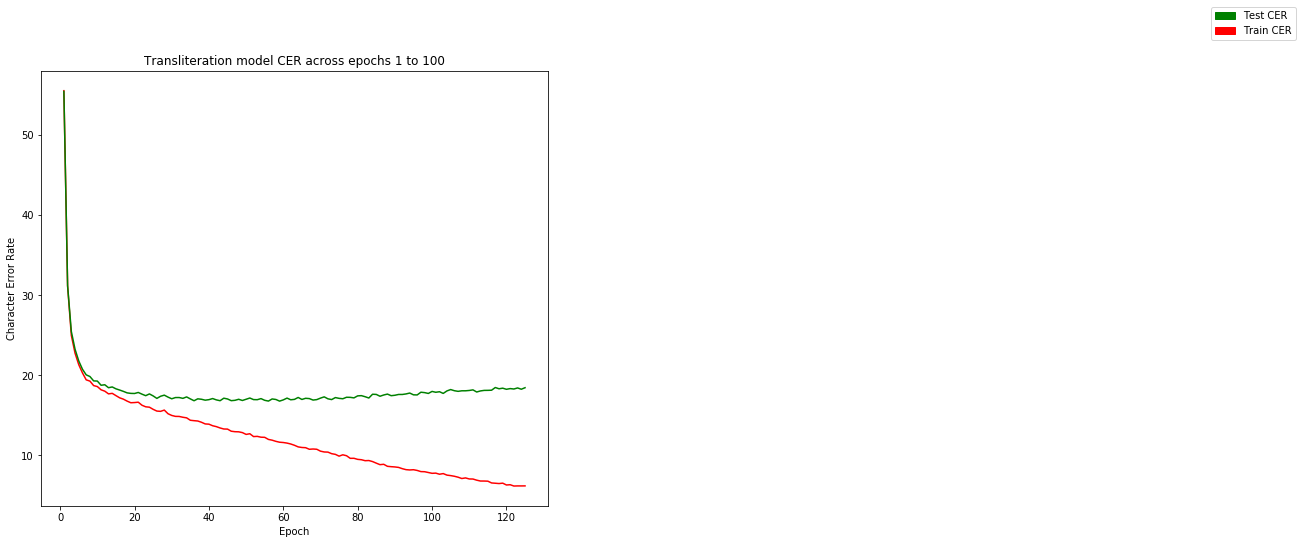

In [31]:
fold = 1
testSourceFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/testMixed' + str(fold) + '.source.txt'
trainSourceFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/trainMixed' + str(fold) + '.source.txt'
testTargetFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/testMixed' + str(fold) + '.target.txt'
trainTargetFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/trainMixed' + str(fold) + '.target.txt'

with open(trainSourceFile, 'r') as fp:
    trainSource = fp.readlines()
    
for i in range(len(trainSource)):
    trainSource[i] = trainSource[i].strip('\n')
    string = ''
    for ch in trainSource[i].split(' '):
        if ch != '':
            string += revEnglishMap[int(ch)]
    trainSource[i] = string

with open(testSourceFile, 'r') as fp:
    testSource = fp.readlines()
    
for i in range(len(testSource)):
    testSource[i] = testSource[i].strip('\n')
    string = ''
    for ch in testSource[i].split(' '):
        if ch != '':
            string += revEnglishMap[int(ch)]
    testSource[i] = string

with open(trainTargetFile, 'r') as fp:
    trainTarget = fp.readlines()
    
for i in range(len(trainTarget)):
    trainTarget[i] = trainTarget[i].strip('\n')
    string = ''
    for ch in trainTarget[i].split(' '):
        if ch != '':
            string += devanagariChars[int(ch)]
    trainTarget[i] = string

with open(testTargetFile, 'r') as fp:
    testTarget = fp.readlines()
    
for i in range(len(testTarget)):
    testTarget[i] = testTarget[i].strip('\n')
    string = ''
    for ch in testTarget[i].split(' '):
        if ch != '':
            string += devanagariChars[int(ch)]
    testTarget[i] = string
    
checkPoints = [101101, 133453, 163109, 4045, 72793, 102449, 134801, 164457, 41789, 74141, 103797, 13481, 165805, 43137, 75489, 105145, 1349, 167153, 44485, 76837, 106493, 136149, 168501, 45833, 78185, 107841, 137497, 169849, 47181, 79533, 10785, 138845, 17525, 48529, 80881, 109189, 140193, 18873, 49877, 8089, 110537, 141541, 1, 51225, 82229, 111885, 142889, 20221, 52573, 83577, 113233, 144237, 21569, 53921, 84925, 114581, 145585, 22917, 5393, 86273, 115929, 146933, 24265, 55269, 87621, 117277, 148281, 25613, 56617, 88969, 118625, 14829, 26961, 57965, 90317, 119973, 149629, 2697, 59313, 91665, 121321, 150977, 28309, 60661, 93013, 12133, 152325, 29657, 62009, 94361, 122669, 153673, 31005, 63357, 9437, 124017, 155021, 32353, 64705, 95709, 125365, 156369, 33701, 66053, 97057, 126713, 157717, 35049, 67401, 98405, 128061, 159065, 36397, 6741, 99753, 129409, 160413, 37745, 68749, 130757, 161761, 39093, 70097, 132105, 16177, 40441, 71445]
checkPoints = sorted(checkPoints)

trainPredictionFiles = ['/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_' + str(fold) + '/predTrain/predictions' + str(ckp) + '.txt' for ckp in checkPoints]
testPredictionFiles = ['/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_' + str(fold) + '/predTest/predictions' + str(ckp) + '.txt' for ckp in checkPoints]

trainCERRecord = []
for fileName in trainPredictionFiles[2:]:
    

    if trainPredictionFiles.index(fileName) % 50 == 0:
        print fileName
        
    with open(fileName, 'r') as fp:
        trainPredicted = fp.readlines()

    for i in range(len(trainPredicted)):
        trainPredicted[i] = trainPredicted[i].strip('\n')
        string = ''
        for ch in trainPredicted[i].split(' '):
            if ch != '':
                string += devanagariChars[int(ch)]
        trainPredicted[i] = string
    
    CER = 0.
    for i in range(len(trainPredicted)):
        CER += (float(editdistance.eval(trainTarget[i], trainPredicted[i])) / len(trainTarget[i]))
    CER /= len(trainPredicted)
    CER *= 100
    trainCERRecord.append(CER)

testCERRecord = []

for fileName in testPredictionFiles[2: ]:

    if testPredictionFiles.index(fileName) % 50 == 0:
        print fileName
        
    with open(fileName, 'r') as fp:
        testPredicted = fp.readlines()
    
    for i in range(len(testPredicted)):
        testPredicted[i] = testPredicted[i].strip('\n')
        string = ''
        for ch in testPredicted[i].split(' '):
            if ch != '':
                string += devanagariChars[int(ch)]
        testPredicted[i] = string
    
    CER = 0.
    for i in range(len(testPredicted)):
        CER += (float(editdistance.eval(testTarget[i], testPredicted[i])) / len(testTarget[i]))
    CER /= len(testPredicted)
    CER *= 100
    testCERRecord.append(CER)
    
pylab.rcParams['figure.figsize'] = (20, 8)

plt.subplot(1, 2, 1)
plt.plot([i + 1 for i in range(len(testCERRecord[:]))], trainCERRecord[:], c = 'red')
plt.plot([i + 1 for i in range(len(testCERRecord[:]))], testCERRecord[:], c = 'green')    
axes = plt.gca()
# axes.set_xlim([1, 100])
# axes.set_ylim([5, 60])

red_patch   = mpatches.Patch(color = 'red',   label = 'Train CER')
green_patch = mpatches.Patch(color = 'green', label = 'Test CER')
plt.legend(handles=[green_patch, red_patch], bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.xlabel('Epoch')
plt.ylabel('Character Error Rate')
plt.title('Transliteration model CER across epochs 1 to 100')

print 'Test', '\t\t\t', 'Train'
print min(testCERRecord), np.argmin(testCERRecord), trainCERRecord[np.argmin(testCERRecord)]
print testCERRecord[np.argmin(trainCERRecord)], np.argmin(trainCERRecord), min(trainCERRecord)
# print trainPredictionFiles[np.argmin(testCERRecord)]



# LSTM Fold 2

/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_2/predTrain/predictions67401.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_2/predTrain/predictions133454.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_2/predTrain/predictions200854.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_2/predTrain/predictions268254.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_2/predTest/predictions67401.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_2/predTest/predictions133454.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_2/predTest/predictions200854.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeE

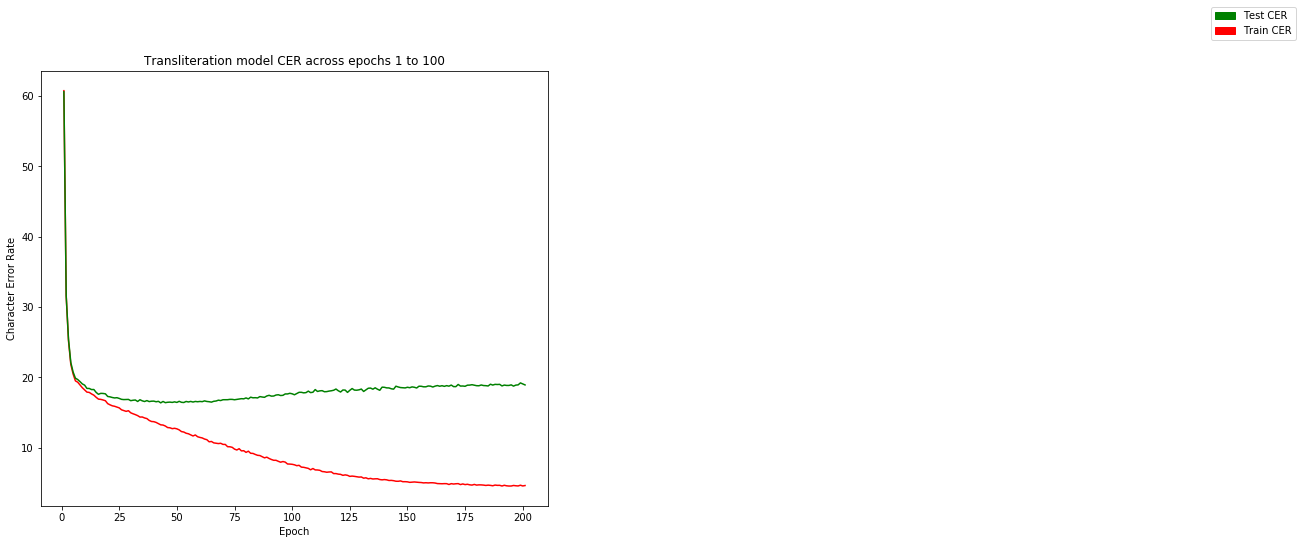

In [32]:
fold = 2
testSourceFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/testMixed' + str(fold) + '.source.txt'
trainSourceFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/trainMixed' + str(fold) + '.source.txt'
testTargetFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/testMixed' + str(fold) + '.target.txt'
trainTargetFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/trainMixed' + str(fold) + '.target.txt'

with open(trainSourceFile, 'r') as fp:
    trainSource = fp.readlines()
    
for i in range(len(trainSource)):
    trainSource[i] = trainSource[i].strip('\n')
    string = ''
    for ch in trainSource[i].split(' '):
        if ch != '':
            string += revEnglishMap[int(ch)]
    trainSource[i] = string

with open(testSourceFile, 'r') as fp:
    testSource = fp.readlines()
    
for i in range(len(testSource)):
    testSource[i] = testSource[i].strip('\n')
    string = ''
    for ch in testSource[i].split(' '):
        if ch != '':
            string += revEnglishMap[int(ch)]
    testSource[i] = string

with open(trainTargetFile, 'r') as fp:
    trainTarget = fp.readlines()
    
for i in range(len(trainTarget)):
    trainTarget[i] = trainTarget[i].strip('\n')
    string = ''
    for ch in trainTarget[i].split(' '):
        if ch != '':
            string += devanagariChars[int(ch)]
    trainTarget[i] = string

with open(testTargetFile, 'r') as fp:
    testTarget = fp.readlines()
    
for i in range(len(testTarget)):
    testTarget[i] = testTarget[i].strip('\n')
    string = ''
    for ch in testTarget[i].split(' '):
        if ch != '':
            string += devanagariChars[int(ch)]
    testTarget[i] = string
    
checkPoints = [101102, 149630, 1, 249382, 5393, 102450, 150978, 200854, 250730, 55269, 103798, 152326, 202202, 252078, 56617, 105146, 153674, 20221, 253426, 57965, 106494, 155022, 203550, 254774, 59313, 107842, 156370, 204898, 256122, 60661, 10785, 157718, 206246, 25613, 62009, 109190, 159066, 207594, 257470, 63357, 110538, 160414, 208942, 258818, 64705, 111886, 161762, 210290, 260166, 66053, 113234, 16177, 211638, 261514, 67401, 114582, 163110, 212986, 262862, 6741, 115930, 164458, 214334, 264210, 68749, 117278, 165806, 215682, 265558, 70097, 118626, 167154, 21569, 266906, 71445, 119974, 168502, 217030, 268254, 72793, 121322, 169850, 218378, 269602, 74141, 12133, 171198, 219726, 26961, 75489, 122670, 172546, 221074, 2697, 76837, 124018, 173894, 222422, 270950, 78185, 125366, 175242, 223770, 28309, 79533, 126714, 17525, 225118, 29657, 80881, 128062, 176590, 226466, 31005, 8089, 129410, 177938, 227814, 32353, 82229, 130758, 179286, 229162, 33701, 83577, 132106, 180634, 22917, 35049, 84925, 133454, 181982, 230510, 36397, 86273, 134802, 183330, 231858, 37745, 87621, 13481, 184678, 233206, 39093, 88969, 1349, 186026, 234554, 40441, 90317, 136150, 187374, 235902, 4045, 91665, 137498, 188722, 237250, 41789, 93013, 138846, 18873, 238598, 43137, 94361, 140194, 190070, 239946, 44485, 9437, 141542, 191418, 241294, 45833, 95709, 142890, 192766, 242642, 47181, 95710, 144238, 194114, 24265, 48529, 97058, 145586, 195462, 243990, 49877, 98406, 146934, 196810, 245338, 51225, 99754, 148282, 198158, 246686, 52573, 14829, 199506, 248034, 53921]
checkPoints = sorted(checkPoints)

trainPredictionFiles = ['/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_' + str(fold) + '/predTrain/predictions' + str(ckp) + '.txt' for ckp in checkPoints]
testPredictionFiles = ['/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_' + str(fold) + '/predTest/predictions' + str(ckp) + '.txt' for ckp in checkPoints]

trainCERRecord = []
for fileName in trainPredictionFiles[2:]:
    

    if trainPredictionFiles.index(fileName) % 50 == 0:
        print fileName
        
    with open(fileName, 'r') as fp:
        trainPredicted = fp.readlines()

    for i in range(len(trainPredicted)):
        trainPredicted[i] = trainPredicted[i].strip('\n')
        string = ''
        for ch in trainPredicted[i].split(' '):
            if ch != '':
                string += devanagariChars[int(ch)]
        trainPredicted[i] = string
    
    CER = 0.
    for i in range(len(trainPredicted)):
        CER += (float(editdistance.eval(trainTarget[i], trainPredicted[i])) / len(trainTarget[i]))
    CER /= len(trainPredicted)
    CER *= 100
    trainCERRecord.append(CER)

testCERRecord = []

for fileName in testPredictionFiles[2: ]:

    if testPredictionFiles.index(fileName) % 50 == 0:
        print fileName
        
    with open(fileName, 'r') as fp:
        testPredicted = fp.readlines()
    
    for i in range(len(testPredicted)):
        testPredicted[i] = testPredicted[i].strip('\n')
        string = ''
        for ch in testPredicted[i].split(' '):
            if ch != '':
                string += devanagariChars[int(ch)]
        testPredicted[i] = string
    
    CER = 0.
    for i in range(len(testPredicted)):
        CER += (float(editdistance.eval(testTarget[i], testPredicted[i])) / len(testTarget[i]))
    CER /= len(testPredicted)
    CER *= 100
    testCERRecord.append(CER)
    
pylab.rcParams['figure.figsize'] = (20, 8)

plt.subplot(1, 2, 1)
plt.plot([i + 1 for i in range(len(testCERRecord[:]))], trainCERRecord[:], c = 'red')
plt.plot([i + 1 for i in range(len(testCERRecord[:]))], testCERRecord[:], c = 'green')    
axes = plt.gca()
# axes.set_xlim([1, 100])
# axes.set_ylim([5, 60])

red_patch   = mpatches.Patch(color = 'red',   label = 'Train CER')
green_patch = mpatches.Patch(color = 'green', label = 'Test CER')
plt.legend(handles=[green_patch, red_patch], bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.xlabel('Epoch')
plt.ylabel('Character Error Rate')
plt.title('Transliteration model CER across epochs 1 to 100')

print 'Test', '\t\t\t', 'Train'
print min(testCERRecord), np.argmin(testCERRecord), trainCERRecord[np.argmin(testCERRecord)]
print testCERRecord[np.argmin(trainCERRecord)], np.argmin(trainCERRecord), min(trainCERRecord)
# print trainPredictionFiles[np.argmin(testCERRecord)]



# LSTM Fold 3

/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_3/predTrain/predictions67401.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_3/predTrain/predictions133454.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_3/predTrain/predictions200854.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_3/predTrain/predictions268254.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_3/predTest/predictions67401.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_3/predTest/predictions133454.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_3/predTest/predictions200854.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeE

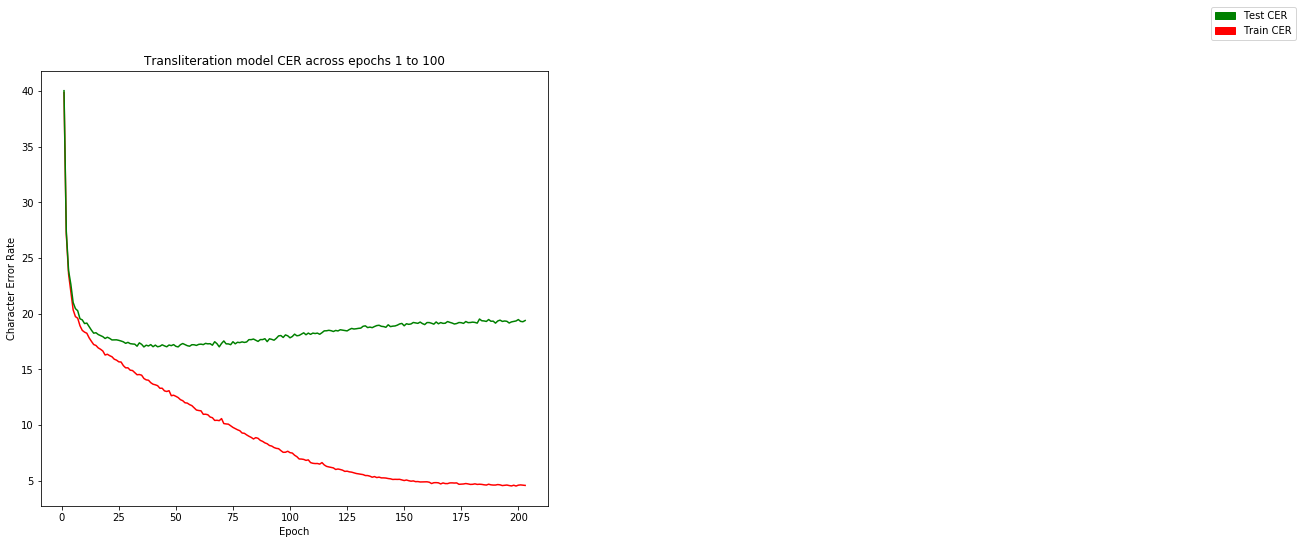

In [33]:
fold = 3
testSourceFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/testMixed' + str(fold) + '.source.txt'
trainSourceFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/trainMixed' + str(fold) + '.source.txt'
testTargetFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/testMixed' + str(fold) + '.target.txt'
trainTargetFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/trainMixed' + str(fold) + '.target.txt'

with open(trainSourceFile, 'r') as fp:
    trainSource = fp.readlines()
    
for i in range(len(trainSource)):
    trainSource[i] = trainSource[i].strip('\n')
    string = ''
    for ch in trainSource[i].split(' '):
        if ch != '':
            string += revEnglishMap[int(ch)]
    trainSource[i] = string

with open(testSourceFile, 'r') as fp:
    testSource = fp.readlines()
    
for i in range(len(testSource)):
    testSource[i] = testSource[i].strip('\n')
    string = ''
    for ch in testSource[i].split(' '):
        if ch != '':
            string += revEnglishMap[int(ch)]
    testSource[i] = string

with open(trainTargetFile, 'r') as fp:
    trainTarget = fp.readlines()
    
for i in range(len(trainTarget)):
    trainTarget[i] = trainTarget[i].strip('\n')
    string = ''
    for ch in trainTarget[i].split(' '):
        if ch != '':
            string += devanagariChars[int(ch)]
    trainTarget[i] = string

with open(testTargetFile, 'r') as fp:
    testTarget = fp.readlines()
    
for i in range(len(testTarget)):
    testTarget[i] = testTarget[i].strip('\n')
    string = ''
    for ch in testTarget[i].split(' '):
        if ch != '':
            string += devanagariChars[int(ch)]
    testTarget[i] = string
    
checkPoints = [101102, 149630, 1, 249382, 52573, 102450, 150978, 200854, 250730, 53921, 103798, 152326, 202202, 252078, 5393, 105146, 153674, 20221, 253426, 55269, 106494, 155022, 203550, 254774, 56617, 107842, 156370, 204898, 256122, 57965, 10785, 157718, 206246, 25613, 59313, 109190, 159066, 207594, 257470, 60661, 110538, 160414, 208942, 258818, 62009, 111886, 161762, 210290, 260166, 63357, 113234, 16177, 211638, 261514, 64705, 114582, 163110, 212986, 262862, 66053, 115930, 164458, 214334, 264210, 67401, 117278, 165806, 215682, 265558, 6741, 118626, 167154, 21569, 266906, 68749, 119974, 168502, 217030, 268254, 70097, 121322, 169850, 218378, 269602, 71445, 12133, 171198, 219726, 26961, 72793, 122670, 172546, 221074, 2697, 74141, 124018, 173894, 222422, 270950, 75489, 125366, 175242, 223770, 272298, 76837, 126714, 17525, 225118, 273646, 78185, 128062, 176590, 226466, 28309, 79533, 129410, 177938, 227814, 29657, 80881, 130758, 179286, 229162, 31005, 8089, 132106, 180634, 22917, 32353, 82229, 133454, 181982, 230510, 33701, 83577, 134802, 183330, 231858, 35049, 84925, 13481, 184678, 233206, 36397, 86273, 1349, 186026, 234554, 37745, 87621, 136150, 187374, 235902, 39093, 88969, 137498, 188722, 237250, 40441, 90317, 138846, 18873, 238598, 4045, 91665, 140194, 190070, 239946, 41789, 93013, 141542, 191418, 241294, 43137, 94361, 142890, 192766, 242642, 44485, 9437, 144238, 194114, 24265, 45833, 95709, 145586, 195462, 243990, 47181, 97057, 146934, 196810, 245338, 48529, 98405, 148282, 198158, 246686, 49877, 98406, 14829, 199506, 248034, 51225, 99754]
checkPoints = sorted(checkPoints)

trainPredictionFiles = ['/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_' + str(fold) + '/predTrain/predictions' + str(ckp) + '.txt' for ckp in checkPoints]
testPredictionFiles = ['/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_' + str(fold) + '/predTest/predictions' + str(ckp) + '.txt' for ckp in checkPoints]

trainCERRecord = []
for fileName in trainPredictionFiles[2:]:
    

    if trainPredictionFiles.index(fileName) % 50 == 0:
        print fileName
        
    with open(fileName, 'r') as fp:
        trainPredicted = fp.readlines()

    for i in range(len(trainPredicted)):
        trainPredicted[i] = trainPredicted[i].strip('\n')
        string = ''
        for ch in trainPredicted[i].split(' '):
            if ch != '':
                string += devanagariChars[int(ch)]
        trainPredicted[i] = string
    
    CER = 0.
    for i in range(len(trainPredicted)):
        CER += (float(editdistance.eval(trainTarget[i], trainPredicted[i])) / len(trainTarget[i]))
    CER /= len(trainPredicted)
    CER *= 100
    trainCERRecord.append(CER)

testCERRecord = []

for fileName in testPredictionFiles[2: ]:

    if testPredictionFiles.index(fileName) % 50 == 0:
        print fileName
        
    with open(fileName, 'r') as fp:
        testPredicted = fp.readlines()
    
    for i in range(len(testPredicted)):
        testPredicted[i] = testPredicted[i].strip('\n')
        string = ''
        for ch in testPredicted[i].split(' '):
            if ch != '':
                string += devanagariChars[int(ch)]
        testPredicted[i] = string
    
    CER = 0.
    for i in range(len(testPredicted)):
        CER += (float(editdistance.eval(testTarget[i], testPredicted[i])) / len(testTarget[i]))
    CER /= len(testPredicted)
    CER *= 100
    testCERRecord.append(CER)
    
pylab.rcParams['figure.figsize'] = (20, 8)

plt.subplot(1, 2, 1)
plt.plot([i + 1 for i in range(len(testCERRecord[:]))], trainCERRecord[:], c = 'red')
plt.plot([i + 1 for i in range(len(testCERRecord[:]))], testCERRecord[:], c = 'green')    
axes = plt.gca()
# axes.set_xlim([1, 100])
# axes.set_ylim([5, 60])

red_patch   = mpatches.Patch(color = 'red',   label = 'Train CER')
green_patch = mpatches.Patch(color = 'green', label = 'Test CER')
plt.legend(handles=[green_patch, red_patch], bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.xlabel('Epoch')
plt.ylabel('Character Error Rate')
plt.title('Transliteration model CER across epochs 1 to 100')

print 'Test', '\t\t\t', 'Train'
print min(testCERRecord), np.argmin(testCERRecord), trainCERRecord[np.argmin(testCERRecord)]
print testCERRecord[np.argmin(trainCERRecord)], np.argmin(trainCERRecord), min(trainCERRecord)
# print trainPredictionFiles[np.argmin(testCERRecord)]


# LSTM Fold 4

/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_4/predTrain/predictions67401.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_4/predTrain/predictions134801.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_4/predTrain/predictions202201.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_4/predTest/predictions67401.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_4/predTest/predictions134801.txt
/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_4/predTest/predictions202201.txt
Test 			Train
16.4780140681 52 12.0627277522
18.8106639628 193 4.65220435855


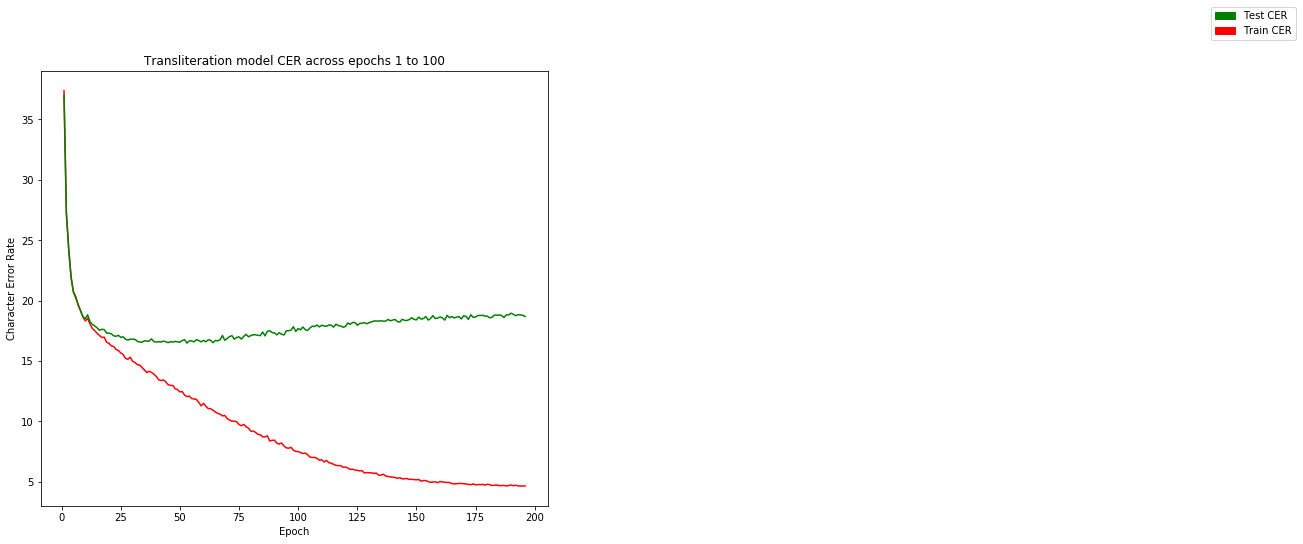

In [36]:
fold = 4
testSourceFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/testMixed' + str(fold) + '.source.txt'
trainSourceFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/trainMixed' + str(fold) + '.source.txt'
testTargetFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/testMixed' + str(fold) + '.target.txt'
trainTargetFile = '/home/kushagras/work/transliterationData/romanToDevanagiri/folds/trainMixed' + str(fold) + '.target.txt'

with open(trainSourceFile, 'r') as fp:
    trainSource = fp.readlines()
    
for i in range(len(trainSource)):
    trainSource[i] = trainSource[i].strip('\n')
    string = ''
    for ch in trainSource[i].split(' '):
        if ch != '':
            string += revEnglishMap[int(ch)]
    trainSource[i] = string

with open(testSourceFile, 'r') as fp:
    testSource = fp.readlines()
    
for i in range(len(testSource)):
    testSource[i] = testSource[i].strip('\n')
    string = ''
    for ch in testSource[i].split(' '):
        if ch != '':
            string += revEnglishMap[int(ch)]
    testSource[i] = string

with open(trainTargetFile, 'r') as fp:
    trainTarget = fp.readlines()
    
for i in range(len(trainTarget)):
    trainTarget[i] = trainTarget[i].strip('\n')
    string = ''
    for ch in trainTarget[i].split(' '):
        if ch != '':
            string += devanagariChars[int(ch)]
    trainTarget[i] = string

with open(testTargetFile, 'r') as fp:
    testTarget = fp.readlines()
    
for i in range(len(testTarget)):
    testTarget[i] = testTarget[i].strip('\n')
    string = ''
    for ch in testTarget[i].split(' '):
        if ch != '':
            string += devanagariChars[int(ch)]
    testTarget[i] = string
    
checkPoints = [101101, 14829, 198157, 245337, 5393, 102449, 149629, 199505, 246685, 55269, 103797, 150977, 1, 248033, 56617, 105145, 152325, 200853, 249381, 57965, 106493, 153673, 202201, 250729, 59313, 107841, 155021, 20221, 252077, 60661, 10785, 156369, 203549, 253425, 62009, 109189, 157717, 204897, 254773, 63357, 110537, 159065, 206245, 256121, 64705, 111885, 160413, 207593, 25613, 66053, 113233, 161761, 208941, 257469, 67401, 114581, 16177, 210289, 258817, 6741, 115929, 163109, 211637, 260165, 68749, 117277, 164457, 212985, 261513, 70097, 118625, 165805, 214333, 262861, 71445, 119973, 167153, 215681, 264209, 72793, 121321, 168501, 21569, 265557, 74141, 12133, 169849, 217029, 26961, 75489, 122669, 171197, 218377, 2697, 76837, 124017, 172545, 219725, 28309, 78185, 125365, 173893, 221073, 29657, 79533, 126713, 175241, 222421, 31005, 80881, 128061, 17525, 223769, 32353, 8089, 129409, 176589, 225117, 33701, 82229, 130757, 177937, 226465, 35049, 83577, 132105, 179285, 227813, 36397, 84925, 133453, 180633, 229161, 37745, 86273, 134801, 181981, 22917, 39093, 87621, 13481, 183329, 230509, 40441, 88969, 1349, 184677, 231857, 4045, 90317, 136149, 186025, 233205, 41789, 91665, 137497, 187373, 234553, 43137, 93013, 138845, 188721, 235901, 44485, 94361, 140193, 18873, 237249, 45833, 9437, 141541, 190069, 238597, 47181, 95709, 142889, 191417, 239945, 48529, 97057, 144237, 192765, 241293, 49877, 98405, 145585, 194113, 242641, 51225, 99753, 146933, 195461, 24265, 52573, 148281, 196809, 243989, 53921]
checkPoints = sorted(checkPoints)

trainPredictionFiles = ['/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_' + str(fold) + '/predTrain/predictions' + str(ckp) + '.txt' for ckp in checkPoints]
testPredictionFiles = ['/home/kushagras/tmp/LSTM_3_3_AttentionLayerBahdanau_NonReverse_InitialStateBridge_LargeEmbedding_' + str(fold) + '/predTest/predictions' + str(ckp) + '.txt' for ckp in checkPoints]

trainCERRecord = []
for fileName in trainPredictionFiles[2:]:
    

    if trainPredictionFiles.index(fileName) % 50 == 0:
        print fileName
        
    with open(fileName, 'r') as fp:
        trainPredicted = fp.readlines()

    for i in range(len(trainPredicted)):
        trainPredicted[i] = trainPredicted[i].strip('\n')
        string = ''
        for ch in trainPredicted[i].split(' '):
            if ch != '':
                string += devanagariChars[int(ch)]
        trainPredicted[i] = string
    
    CER = 0.
    for i in range(len(trainPredicted)):
        CER += (float(editdistance.eval(trainTarget[i], trainPredicted[i])) / len(trainTarget[i]))
    CER /= len(trainPredicted)
    CER *= 100
    trainCERRecord.append(CER)

testCERRecord = []

for fileName in testPredictionFiles[2: ]:

    if testPredictionFiles.index(fileName) % 50 == 0:
        print fileName
        
    with open(fileName, 'r') as fp:
        testPredicted = fp.readlines()
    
    for i in range(len(testPredicted)):
        testPredicted[i] = testPredicted[i].strip('\n')
        string = ''
        for ch in testPredicted[i].split(' '):
            if ch != '':
                string += devanagariChars[int(ch)]
        testPredicted[i] = string
    
    CER = 0.
    for i in range(len(testPredicted)):
        CER += (float(editdistance.eval(testTarget[i], testPredicted[i])) / len(testTarget[i]))
    CER /= len(testPredicted)
    CER *= 100
    testCERRecord.append(CER)
    
pylab.rcParams['figure.figsize'] = (20, 8)

plt.subplot(1, 2, 1)
plt.plot([i + 1 for i in range(len(testCERRecord[:]))], trainCERRecord[:], c = 'red')
plt.plot([i + 1 for i in range(len(testCERRecord[:]))], testCERRecord[:], c = 'green')    
axes = plt.gca()
# axes.set_xlim([1, 100])
# axes.set_ylim([5, 60])

red_patch   = mpatches.Patch(color = 'red',   label = 'Train CER')
green_patch = mpatches.Patch(color = 'green', label = 'Test CER')
plt.legend(handles=[green_patch, red_patch], bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.xlabel('Epoch')
plt.ylabel('Character Error Rate')
plt.title('Transliteration model CER across epochs 1 to 100')

print 'Test', '\t\t\t', 'Train'
print min(testCERRecord), np.argmin(testCERRecord), trainCERRecord[np.argmin(testCERRecord)]
print testCERRecord[np.argmin(trainCERRecord)], np.argmin(trainCERRecord), min(trainCERRecord)
# print trainPredictionFiles[np.argmin(testCERRecord)]

# Compiling results for LSTM model

In [38]:
LSTMFoldTestErrors = [16.7503978255, 16.7705676217, 16.3838325075, 17.0073556901, 16.4780140681]
LSTMFoldTrainErrors = [12.6914975514, 11.6395354804, 13.2621540802, 14.172491537, 12.0627277522]

print np.average(LSTMFoldTestErrors), np.average(LSTMFoldTrainErrors)

16.6780335426 12.7656812802
